# Monte Carlo Methods

In [4]:
# Global imports and style settings
using PyPlot, Distributions, LaTeXStrings, PyCall
plt.style[:use]("mystyle.mplstyle");

## Generating Random Variables

### Inverse Transform Method

#### Intuition

Start by considering the CDF, $F(x)$, of a Beta-distributed random variable $X_i \sim \text{Beta}(\alpha,\beta)$ (example below). By definition, for any draw $\hat{x}_i$, we see that $F(\hat{x}_i)$ must lie on [0,1].

This suggests the following approach:
* Throw $\text{Unif}[0,1]$ draws, denoted $\hat{u}_i$, against the $y$-axis
* Map those draws to the corresponding unique $\text{Beta}(\alpha,\beta)$ draws on the $x$-axis. 

The arrows show specific examples and the order to proceed in.

When the CDF is steep, a small change in a $\hat{u}_i$ draw won't change the corresponding $\hat{x}_i$ very much; therefore, we'll accumulate lots of mass clustered around such $\hat{x}_i$ over many draws. The opposite holds when the CDF is flat. In this way, we map uniform draws (which are easy to draw from using fast algorithms) directly into draws that match other highly non-uniform distributions. 

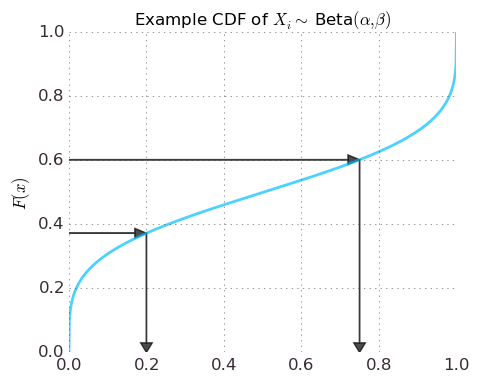

In [61]:
α, β = 0.25, 0.25
f, F = map((fcn) -> ((x) -> fcn(Beta(α,β), x)), [pdf, cdf])
x = 0:0.001:1

p = Array(Any,4)
figure(figsize=(5,4))

plot(x,F(x), alpha=0.7);
lines_at = [0.2, 0.75]; arwsz = 0.03;
draw_arrow = (x,y,dx,dy,sz) -> arrow(x, y, dx, dy, head_width=sz,head_length=sz)
p[1:2] = map(x -> draw_arrow(0, F(x), x-arwsz, 0, arwsz), lines_at)
p[3:4] = map(x -> draw_arrow(x, F(x), 0, -F(x)+arwsz, arwsz), lines_at)
map(ph -> setp(ph, facecolor="black", edgecolor="black", alpha=0.7), p)
ylabel(L"$F(x)$"); title(L"Example CDF of $X_i \sim $ Beta$(\alpha,\beta)$");

#### The Math

To see why this works, suppose we want to simulate some random variable $X$ with CDF $F(x)$. Next suppose that $U\sim\text{Unif}([0,1])$ and that $F(x)$ is intvertible.

Set $X' = F^{-1}(U)$. Then $X'$ will have the same distribution as $X$.

_Proof_
$$
$$

#### Example

In this next example, suppose we want to draw $X_i \sim \text{Exp}(\lambda)$. This has pdf and cdf as follows:

$$
\begin{align*}
    f(x) = \lambda e^{-\lambda x} \qquad F(x) &= 1 - e^{-\lambda x} \\
    \Rightarrow \quad F^{-1}(u) &= -\frac{1}{\lambda}\ln(1-u)
\end{align*}
$$

The three plot panels below show the different steps:
1. Simulate $N$ draws from a uniform; example shown in the histogram.
2. Apply the inverse transform setting $\hat{x}_i = F^{-1}(\hat{u}_i)$ for $i=1,\ldots,N$. The resulting empirical CDF for the $\hat{x}_i$ is plotted against the true analytical CDF for comparison. 
3. Plot the analytical pdf against the samples of $\hat{x}_i$ generated by the inverse transform method. 

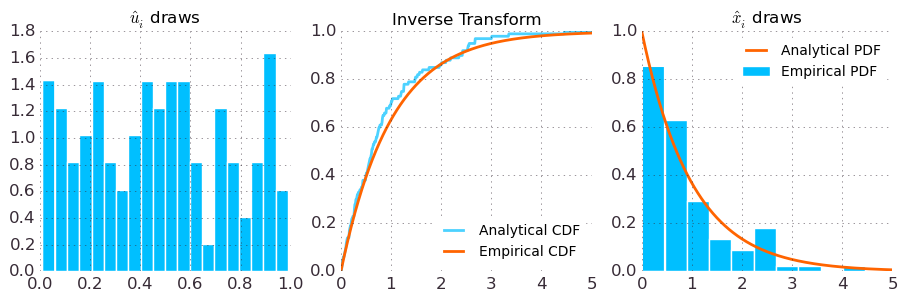

In [62]:
N = 100
λ = 1
f, F = map((fcn) -> ((x) -> fcn(Exponential(λ), x)), [pdf, cdf])
Finv = (u) -> -(1/λ)*log(1 - u)

u_draws = rand(N)
x_draws = Finv(u_draws)
support, counts = hist(x_draws, 0:0.01:5)

figure(figsize=(11,3))
subplot(131)
plt.hist(u_draws, 20, normed=1), title(L"$\hat{u}_i$ draws")

subplot(132)
plot(support[2:end], cumsum(counts)/N, alpha=0.7)
plot(support, F(support))
title("Inverse Transform"); legend(("Analytical CDF", "Empirical CDF"), loc="lower right")

subplot(133)
plt.hist(x_draws, normed=1)
plot(support, f(support))
legend(("Analytical PDF", "Empirical PDF")); title(L"$\hat{x}_i$ draws");